In [6]:
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import re

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
start_date = []
end_date = []
with open('personal.txt', 'r') as personal:
    for line in personal:
        if "Start:" in line:
            start_date.append(line.split(": ")[1].strip())
        if "End:" in line:
            end_date.append(line.split(": ")[1].strip())
with open('cornell.txt', 'r') as personal:
    for line in personal:
        if "Start:" in line:
            start_date.append(line.split(": ")[1].strip())
        if "End:" in line:
            end_date.append(line.split(": ")[1].strip())

In [8]:
startDate = []
endDate = []
for i in range(len(start_date)):
    hasTime = start_date[i].split(" ")
    if(len(hasTime) == 2):
        #startDate.append(hasTime[0] + " " + hasTime[1].replace("-05:00", ""))
        startDate.append(start_date[i].split("+")[0])
        #temp = hasTime[0] + " " + hasTime[1].split("-")[0]
        endDate.append(end_date[i].split("+")[0])

In [9]:
startDate.sort()
endDate.sort()
print(len(startDate))
print(len(endDate))

45
45


In [10]:
#print start_date
start_DateTime = []
end_DateTime = []
unique_Start = []
for i in range(len(startDate)):
    temp = startDate[i].split()
    startDate[i] = temp[0] + " " + temp[1].replace("-05:00", "")
    if temp[0] not in unique_Start:
        unique_Start.append(temp[0])
    temp = endDate[i].split()
    endDate[i] = temp[0] + " " + temp[1].replace("-05:00", "")
    start_DateTime.append(datetime.strptime(startDate[i],"%Y-%m-%d %H:%M:%S"))
    end_DateTime.append(datetime.strptime(endDate[i],"%Y-%m-%d %H:%M:%S"))

In [11]:
len(unique_Start)

28

In [12]:
daily_count = []
dif_min = 0
str_unique_date = []
for i in unique_Start:
    dif_min = 0
    j = 0
    while (j < len(startDate)):
        temp = startDate[j].split()
        if temp[0] == i:
            dif_min += (end_DateTime[j] - start_DateTime[j]).total_seconds() / 60
        j+=1
    if(dif_min < 1440):
        daily_count.append(dif_min)
        str_unique_date.append(str(i))

In [13]:
print("Daily Activity from Calendar Data")
print("    Date        Minutes")
for i in range(len(str_unique_date)):
    print("  {}    {}".format(str_unique_date[i], daily_count[i]))

Daily Activity from Calendar Data
    Date        Minutes
  2017-02-26    60.0
  2017-02-27    150.0
  2017-02-28    390.0
  2017-03-01    315.0
  2017-03-02    135.0
  2017-03-03    135.0
  2017-03-06    60.0
  2017-03-07    150.0
  2017-03-08    195.0
  2017-03-09    195.0
  2017-03-10    60.0
  2017-03-13    120.0
  2017-03-15    315.0
  2017-03-16    75.0
  2017-03-17    90.0
  2017-03-21    135.0
  2017-03-22    195.0
  2017-03-23    195.0
  2017-03-24    60.0
  2017-03-25    60.0
  2017-03-29    195.0
  2017-04-12    60.0
  2017-04-20    195.0
  2017-05-10    60.0
  2017-06-15    845.0
  2017-07-13    544.0


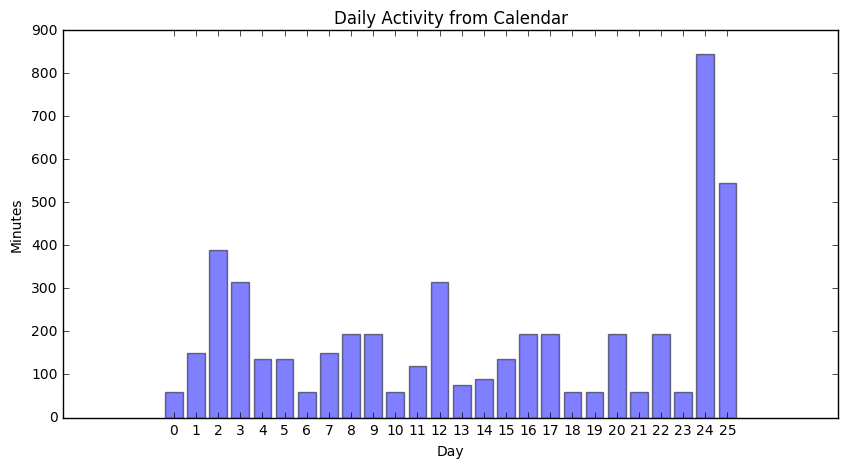

In [14]:
# the histogram of the data 
y_pos = np.arange(len(daily_count))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, daily_count, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, y_pos)
plt.title('Daily Activity from Calendar')
plt.ylabel('Minutes')
plt.xlabel('Day')
plt.show()

In [15]:
print("Daily Activity from Calendar Data")
print("    Date        Minutes")
for i in range(len(str_unique_date)):
    print("  {}    {}".format(str_unique_date[i], daily_count[i]))

Daily Activity from Calendar Data
    Date        Minutes
  2017-02-26    60.0
  2017-02-27    150.0
  2017-02-28    390.0
  2017-03-01    315.0
  2017-03-02    135.0
  2017-03-03    135.0
  2017-03-06    60.0
  2017-03-07    150.0
  2017-03-08    195.0
  2017-03-09    195.0
  2017-03-10    60.0
  2017-03-13    120.0
  2017-03-15    315.0
  2017-03-16    75.0
  2017-03-17    90.0
  2017-03-21    135.0
  2017-03-22    195.0
  2017-03-23    195.0
  2017-03-24    60.0
  2017-03-25    60.0
  2017-03-29    195.0
  2017-04-12    60.0
  2017-04-20    195.0
  2017-05-10    60.0
  2017-06-15    845.0
  2017-07-13    544.0


In [16]:
dict_calendar = {}
for i in range(len(str_unique_date)):
    dict_calendar[str_unique_date[i]] = daily_count[i]


In [17]:
dict_calendar

{'2017-02-26': 60.0,
 '2017-02-27': 150.0,
 '2017-02-28': 390.0,
 '2017-03-01': 315.0,
 '2017-03-02': 135.0,
 '2017-03-03': 135.0,
 '2017-03-06': 60.0,
 '2017-03-07': 150.0,
 '2017-03-08': 195.0,
 '2017-03-09': 195.0,
 '2017-03-10': 60.0,
 '2017-03-13': 120.0,
 '2017-03-15': 315.0,
 '2017-03-16': 75.0,
 '2017-03-17': 90.0,
 '2017-03-21': 135.0,
 '2017-03-22': 195.0,
 '2017-03-23': 195.0,
 '2017-03-24': 60.0,
 '2017-03-25': 60.0,
 '2017-03-29': 195.0,
 '2017-04-12': 60.0,
 '2017-04-20': 195.0,
 '2017-05-10': 60.0,
 '2017-06-15': 845.0,
 '2017-07-13': 544.0}

In [18]:
#Steps
import csv
step = {}
with open('steps.csv', 'r') as stepsFile:
    stepsF = csv.reader(stepsFile)
    
    for i,line in enumerate(stepsF):
        if i > 1:
            start = line[4]
            startDate = (start.split("-")[0]) + "-" + (start.split("-")[1]) + "-" + (start.split("-")[2].split(" ")[0])
            count = int(line[5])
            if(step.has_key(startDate)):
                step[startDate] += count
            else:
                step[startDate] = count

In [19]:
#Sleep
from datetime import datetime

start_date = []
end_date = []
sleep_time = []
days = []

with open('sleep.csv', 'r') as person:
    for row in person:        
        rowed = row.split(',')        
        
        if (len(rowed) > 3):
            if rowed[3] == 'start_time' or rowed[1] == 'end_time':
                continue
            
            start_date = datetime.strptime(rowed[3][:-4],"%Y-%m-%d %H:%M:%S")
            end_date = datetime.strptime(rowed[1][:-4],"%Y-%m-%d %H:%M:%S")
            print(end_date)
            days.append(end_date)
            diff = end_date - start_date
            sleep_time.append(diff.seconds/60/60) # get this is hours

dict_sleep = {}
for i in range(len(days)):
    if(len(str(days[i].date().day)) == 1):
        temp = str(days[i].date().year) + "-0" + str(days[i].date().month) + "-0" + str(days[i].date().day)
    else:
        temp = str(days[i].date().year) + "-0" + str(days[i].date().month) + "-" + str(days[i].date().day)
    dict_sleep[temp] = sleep_time[i]

2016-07-18 02:20:00
2016-07-21 02:20:00
2017-03-07 07:10:00
2017-03-11 08:50:00
2017-03-25 10:40:00
2017-03-24 07:30:00
2017-03-23 10:00:00
2017-03-22 08:00:00
2017-03-21 09:30:00
2017-03-20 09:50:00
2017-03-18 10:20:00
2017-03-17 08:00:00
2017-03-16 09:00:00
2017-03-15 08:10:00
2017-03-13 10:40:00
2017-03-12 10:30:00
2017-03-10 08:10:00
2017-03-08 08:10:00
2017-03-06 08:10:00
2017-03-03 08:20:00
2017-03-01 07:40:00
2017-02-28 07:30:00
2017-02-27 07:20:00
2017-02-26 10:40:00
2017-02-25 10:30:00
2017-02-24 07:00:00


In [32]:
date = []
steps = []
sleep = []
cal = []
for key in step:
    if(dict_calendar.has_key(key) and dict_sleep.has_key(key)):
        date.append(key)

date.sort()
for elm in date:
    steps.append(step[elm])
    cal.append(dict_calendar[elm]/60)
    sleep.append(dict_sleep[elm])

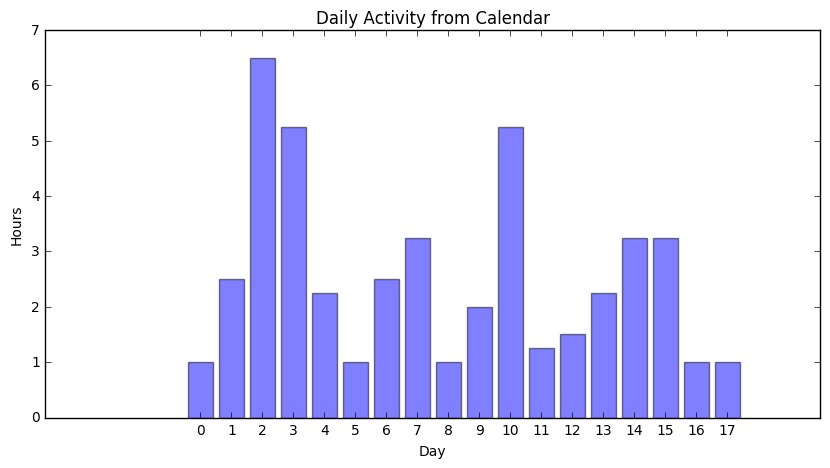

In [34]:
# the histogram of calendar
y_pos = np.arange(len(cal))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, cal, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, y_pos)
plt.title('Daily Activity from Calendar')
plt.ylabel('Hours')
plt.xlabel('Day')
plt.show()

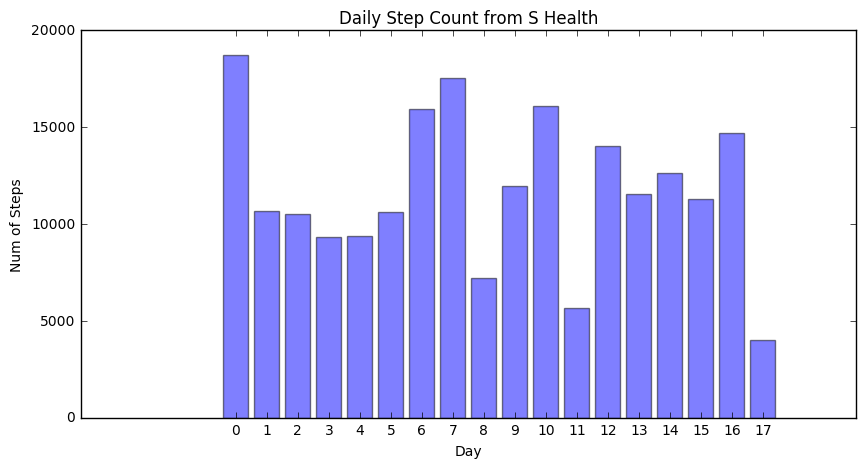

In [35]:
# the histogram of steps
y_pos = np.arange(len(steps))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, steps, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, y_pos)
plt.title('Daily Step Count from S Health')
plt.ylabel('Num of Steps')
plt.xlabel('Day')
plt.show()

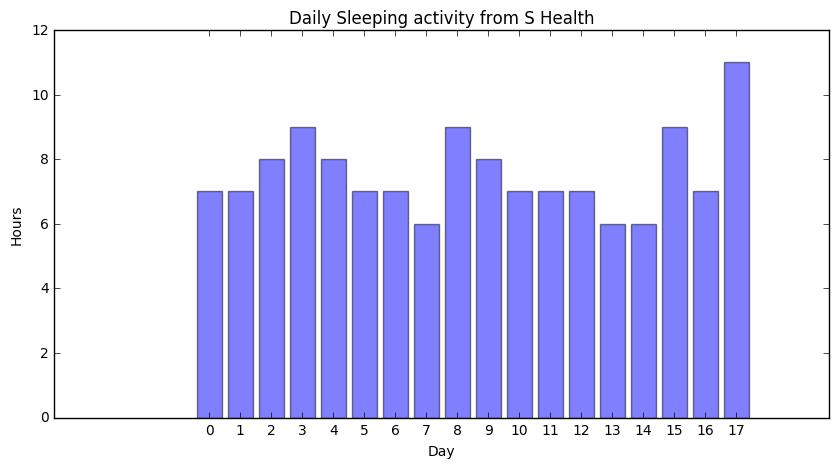

In [36]:
#The histogram of sleep
y_pos = np.arange(len(sleep))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, sleep, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, y_pos)
plt.title('Daily Sleeping activity from S Health')
plt.ylabel('Hours')
plt.xlabel('Day')
plt.show()